# 환경설정

In [84]:
import warnings         # 파이썬 경고문을 안 보여주는 코드
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기

In [85]:
df = pd.read_csv("../data/base_data.csv")

In [86]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AY,HR,AR,Max,Min,Wind,Rain,Humidity,Cloud,Pressure
0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,26,...,2,0,0,24,16,15,0.0,77%,34%,1014
1,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,8,...,0,0,0,19,18,34,0.0,85%,36%,1011
2,2009-08-16,ManU,Birmingham,1,0,H,1,0,H,26,...,1,0,0,17,13,17,0.5,84%,67%,1012
3,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,17,...,3,0,0,24,15,12,0.0,74%,32%,1015
4,2009-08-19,Liverpool,Stoke,4,0,H,2,0,H,18,...,1,0,0,20,18,23,0.0,80%,12%,1016


# 데이터 전처리

## 7개 팀 데이터만 남기기

In [87]:
for i in range(len(df)):
    if df['AwayTeam'][i] not in ['ManU' , 'Everton' , 'Liverpool' , 'Chelsea' , 'Arsenal' , 'ManC' , 'Tottenham']:
        df = df.drop(i)

df.reset_index(drop=True , inplace = True) # 인덱스 초기화

In [88]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AY,HR,AR,Max,Min,Wind,Rain,Humidity,Cloud,Pressure
0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,8,...,0,0,0,19,18,34,0.0,85%,36%,1011
1,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,17,...,3,0,0,24,15,12,0.0,74%,32%,1015
2,2009-08-29,ManU,Arsenal,2,1,H,0,1,A,10,...,6,0,0,16,10,20,0.9,78%,58%,1017
3,2009-09-12,ManC,Arsenal,4,2,H,1,0,H,10,...,2,0,0,19,8,7,0.0,84%,12%,1032
4,2009-09-12,Tottenham,ManU,1,3,A,1,2,A,11,...,2,0,1,22,11,10,0.0,75%,26%,1031


## FTR , HTR

In [89]:
encoder = LabelEncoder()

In [90]:
encoder.fit(df['FTR'])

LabelEncoder()

In [91]:
labels = encoder.transform(df['FTR'])

print('인코딩 변환값:',labels[:5])
print('인코딩 클래스:',encoder.classes_)

인코딩 변환값: [0 2 2 2 0]
인코딩 클래스: ['A' 'D' 'H']


In [92]:
df['FTR'] = labels
df.reset_index(drop = True , inplace = True)

In [93]:
encoder.fit(df['HTR'])

LabelEncoder()

In [94]:
labels = encoder.transform(df['HTR'])

print('인코딩 변환값:',labels[:5])
print('인코딩 클래스:',encoder.classes_)

인코딩 변환값: [0 2 0 2 0]
인코딩 클래스: ['A' 'D' 'H']


In [95]:
df['HTR'] = labels
df.reset_index(drop = True , inplace = True)

In [96]:
df[['FTR' , 'HTR']].head()

,FTR,HTR
0,0,0
1,2,2
2,2,0
3,2,2
4,0,0


## Cloud , Humidity

In [97]:
df[['Humidity' , 'Cloud']].head()

,Humidity,Cloud
0,85%,36%
1,74%,32%
2,78%,58%
3,84%,12%
4,75%,26%


In [98]:
for i in range(len(df)) :
    df['Humidity'][i] = df['Humidity'][i].replace('%' , '')

df['Humidity'] = df['Humidity'].astype("float")
df['Humidity'] = df['Humidity'] * 0.01

In [99]:
for i in range(len(df)) :
    df['Cloud'][i] = df['Cloud'][i].replace('%' , '')

df['Cloud'] = df['Cloud'].astype("float")
df['Cloud'] = df['Cloud'] * 0.01

In [100]:
df[['Humidity' , 'Cloud']].head()

,Humidity,Cloud
0,0.85,0.36
1,0.74,0.32
2,0.78,0.58
3,0.84,0.12
4,0.75,0.26


# 시각화

## 종속변수(=FTR) 확인

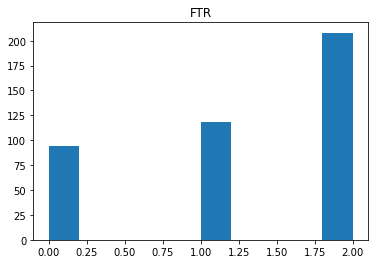

In [101]:
plt.title("FTR")
plt.hist(df['FTR'])
plt.show()

## 상대전적

In [102]:
df['Win'] = 0
df['Draw'] = 0
df['Defeat'] = 0

In [103]:
for i in range(len(df)):
    if df['FTR'][i] == 2 :
        df['Win'][i] = 1
    elif df['FTR'][i] == 1 :
        df['Draw'][i] = 1
    else :
        df['Defeat'][i] = 1

In [104]:
for i in range(7):
    print(pd.pivot_table(df, index = ['HomeTeam','AwayTeam'], values = ['Win' , 'Defeat' , 'Draw'], aggfunc=np.sum)[i*6:i*6+6])

                    Defeat  Draw  Win
HomeTeam AwayTeam                    
Arsenal  Chelsea         3     4    3
         Everton         0     3    7
         Liverpool       2     5    3
         ManC            3     5    2
         ManU            4     2    4
         Tottenham       1     3    6
                    Defeat  Draw  Win
HomeTeam AwayTeam                    
Chelsea  Arsenal         1     1    8
         Everton         0     4    6
         Liverpool       4     3    3
         ManC            3     2    5
         ManU            1     3    6
         Tottenham       1     3    6
                    Defeat  Draw  Win
HomeTeam AwayTeam                    
Everton  Arsenal         5     2    3
         Chelsea         3     1    6
         Liverpool       3     6    1
         ManC            4     1    5
         ManU            3     2    5
         Tottenham       3     4    3
                     Defeat  Draw  Win
HomeTeam  AwayTeam                    
Liverpool 

## 날씨 데이터 시각화

In [105]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [106]:
col = ['Max' , 'Min']

In [107]:
# 무승부 제거
df_v = df.drop(df[df['FTR'] == 1].index).copy()

df_v.reset_index(inplace = True , drop = True)

# 시그모이드 적용하기 위해 승리 값을 1로 변경
for i in range(len(df_v)):
    if df_v['FTR'][i] == 2 :
        df_v['FTR'][i] = 1

df_v['FTR'].value_counts()

1    208
0     94
Name: FTR, dtype: int64

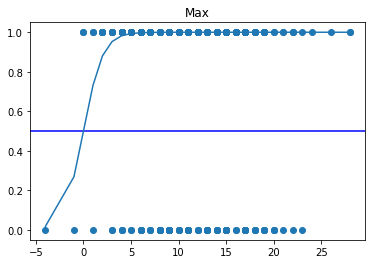

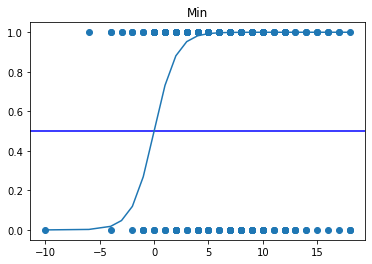

In [108]:
for i in range(len(col)):
    df_v = df_v.sort_values(by=[col[i]], ascending=[True]) 
    df_v.reset_index(drop = True , inplace = True)
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot()
    ax.axhline(0.5 , color = 'b')
    plt.title(col[i])
    plt.scatter(df_v[col[i]] , df_v['FTR'])
    plt.plot( df_v[col[i]] , sigmoid(df_v[col[i]]) )
    plt.show()

# 날씨 , 축구 데이터로 나누기

In [109]:
df_w = df[['HomeTeam' , 'AwayTeam' , 'Max' , 'Min' , 'Wind' , 'Rain' ,'Humidity' , 'Cloud' , 'FTR']]

In [110]:
df_s = df.drop(columns = ['Date' , 'Max' , 'Min' , 'Wind' , 'Rain' ,'Humidity' , 'Cloud' ,'Pressure' , 'FTHG' , 'FTAG' , 'Win' , 'Draw' ,'Defeat'])

In [111]:
df_w.reset_index(drop=True , inplace = True)
df_s.reset_index(drop=True , inplace = True)

In [112]:
df_w.head()

,HomeTeam,AwayTeam,Max,Min,Wind,Rain,Humidity,Cloud,FTR
0,Everton,Arsenal,19,18,34,0.0,0.85,0.36,0
1,Tottenham,Liverpool,24,15,12,0.0,0.74,0.32,2
2,ManU,Arsenal,16,10,20,0.9,0.78,0.58,2
3,ManC,Arsenal,19,8,7,0.0,0.84,0.12,2
4,Tottenham,ManU,22,11,10,0.0,0.75,0.26,0


In [113]:
df_s.head()

,HomeTeam,AwayTeam,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Everton,Arsenal,0,0,3,0,8,15,5,9,11,13,4,9,0,0,0,0
1,Tottenham,Liverpool,2,1,0,2,17,6,11,3,14,16,6,5,3,3,0,0
2,ManU,Arsenal,2,0,1,0,10,9,4,3,21,15,6,5,3,6,0,0
3,ManC,Arsenal,2,1,0,2,10,19,6,9,13,12,3,12,3,2,0,0
4,Tottenham,ManU,0,1,2,0,11,17,7,13,16,13,3,9,3,2,0,1


In [114]:
df_w.to_csv("../data/weather.csv" , index = False)
df_s.to_csv("../data/soccer.csv" , index = False)